<p style="text-align:center">
    </p>

# Supplementary Analysis
by Eliana Gonzalez

This notebook presents the additional analyses conducted during the modeling process of the median spend in Nigeria, which were not included in the final report. These analyses were carried out to evaluate different models and compare their performance in relation to median spend in Nigeria and the independent variables. Although not included in the final report, they provide valuable insights into the decision-making process and factors considered in selecting the final model.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
import pysal
import esda
import spreg
import libpysal.weights as lpw
import pysal.model.spreg as spm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Load the data and store it in dataframe
#The otiginal file is stored in the github repository/googledrive 
filepath= "C:/Users/Belen/Desktop/nga_median_spend_model_train_data.xlsx"
df = pd.read_excel(filepath, sheet_name=0)

In [3]:
### Testing variable selection methods

#### backforward selection variables

X = df.drop(['Unnamed: 0','median_spend', 'lat', 'long'], axis=1)
y = df['median_spend']                                 
X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()

p_values = results.pvalues[1:]  

while p_values.max() > 0.01:
    max_p_index = p_values.idxmax()  
    X = X.drop(max_p_index, axis=1)
    model = sm.OLS(y, X)
    results = model.fit()    
    p_values = results.pvalues[1:]

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           median_spend   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     44.20
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           3.60e-38
Time:                        00:07:25   Log-Likelihood:                -6990.8
No. Observations:                 541   AIC:                         1.399e+04
Df Residuals:                     535   BIC:                         1.402e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [4]:
def multiple_linear_regression(dependent_variable, independent_variables):
    X = sm.add_constant(independent_variables)
    # Fit multiple linear regression
    model = sm.OLS(dependent_variable, X)
    results = model.fit()
    print(results.summary())
    
    # Get residuals
    residuals = results.resid
    
    # Create subplots for residuals and QQ plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot residuals
    ax1.scatter(dependent_variable, residuals)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Dependent Variable')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals Plot')
    
    # QQ plot of residuals
    smg.qqplot(residuals, line='s', ax=ax2)
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles')
    ax2.set_title('QQ Plot of Residuals')
    
    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:           median_spend   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     117.7
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.36e-58
Time:                        00:07:25   Log-Likelihood:                -446.60
No. Observations:                 541   AIC:                             901.2
Df Residuals:                     537   BIC:                             918.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

NameError: name 'smg' is not defined

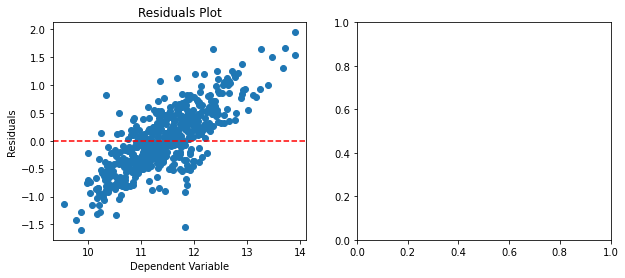

In [5]:
independient_variables = df[['modis_lst_night_average_2015','accessibility_to_cities_2015','viirs_nightlights_2015']]
dependient_variable = np.log(df['median_spend'])
multiple_linear_regression(dependient_variable, independient_variables)

In [ ]:
independient_variables = df[['modis_lst_night_average_2015','accessibility_to_cities_2015','viirs_nightlights_2015','chirps_2015']]
dependient_variable = np.log(df['median_spend'])
multiple_linear_regression(dependient_variable, independient_variables)

In [ ]:
#Function to test models adding higher-order terms.

def multiple_linear_regression2(dependient_variable, independient_variables):   
    X = sm.add_constant(independient_variables)    
    for var in independient_variables.columns:
        X[var + '_squared'] = X[var] ** 2
        X[var + '_cubed'] = X[var] ** 3  
    model = sm.OLS(dependient_variable, X)
    results = model.fit()   
    print(results.summary())   
    residuals = results.resid 
    plt.scatter(dependient_variable, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Variable Dependiente')
    plt.ylabel('Residuos')
    plt.title('Gráfico de Residuos')
    plt.show()

In [ ]:
independient_variables = df[['modis_lst_night_average_2015', 'accessibility_to_cities_2015', 'viirs_nightlights_2015', 'sedac_gpw_2015']]
dependient_variable = np.log(df['median_spend'])
multiple_linear_regression2(dependient_variable, independient_variables)


In [ ]:
independient_variables = df[['modis_lst_night_average_2015', 'accessibility_to_cities_2015', 'viirs_nightlights_2015',]]
independient_variables_log = np.log(independient_variables)
dependient_variable = np.log(df['median_spend'])
multiple_linear_regression(dependient_variable, independient_variables)